In [1]:
import numpy as np
import pymc3 as pm
import scipy as sp
from IPython.display import Image
import prettyplotlib as ppl
from prettyplotlib import plt
import seaborn as sns
sns.set_context('talk')
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica'], 'size': 22})
rc('xtick', labelsize=12) 
rc('ytick', labelsize=12)
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

from IPython.html import widgets # Widget definitions
from IPython.display import display # Used to display widgets in the notebook
from IPython.html.widgets import interact, interactive
from IPython.display import clear_output, display, HTML


%matplotlib inline

In [2]:
np.random.seed(9)
algo_a = sp.stats.bernoulli(.5).rvs(10) # 10 samples from 50% chance of beating the market
algo_b = sp.stats.bernoulli(.6).rvs(10) # 10 samples from 60% chance of beating the market

print 'Beat the market algo A: ', algo_a
print 'Beat the market algo B: ', algo_b

Beat the market algo A:  [0 1 0 0 0 0 0 0 0 0]
Beat the market algo B:  [1 0 0 1 0 1 0 0 1 0]


In [3]:
print 'Probability algo A beating the market = %.0f%%' % (np.mean(algo_a) * 100)
print 'Probability algo B beating the market = %.0f%%' % (np.mean(algo_b) * 100)

Probability algo A beating the market = 10%
Probability algo B beating the market = 40%


In [4]:
# Frequentist
def run_exp():
    # Generate 50 random binary variables with probability = 0.5
    test_a = sp.stats.bernoulli(.5).rvs(50)
    test_b = sp.stats.bernoulli(.5).rvs(50)

    for i in range(2, 50):
        # Run statistical t-test
        _, p = sp.stats.ttest_ind(test_a[:i], test_b[:i])
        if p < 0.05:
            return True
        
    return False

p_sign_result = np.mean([run_exp() for i in range(1000)])

print 'Probability of getting significant result even though no\n difference exists = %.2f%%' % (p_sign_result * 100)


Probability of getting significant result even though no
 difference exists = 36.60%


In [5]:
def gen_plot(success=(0, 100), failure=(0, 100)):
    alpha = 5 + success
    beta = 5 + success
    fig = plt.figure(figsize=(8, 6))
    x = np.linspace(0, 1, 100)
    ax = fig.add_subplot(111, xlabel='Chance of success (beating the market)', 
                         ylabel='Probability of hypothesis', 
                         title=r'Posterior probability distribution of $\theta$')
    ax.plot(x, sp.stats.beta(alpha, beta).pdf(x), linewidth=3.)
    ax.set_xticklabels(['0\%', '20\%', '40\%', '60\%', '80\%', '100\%']);

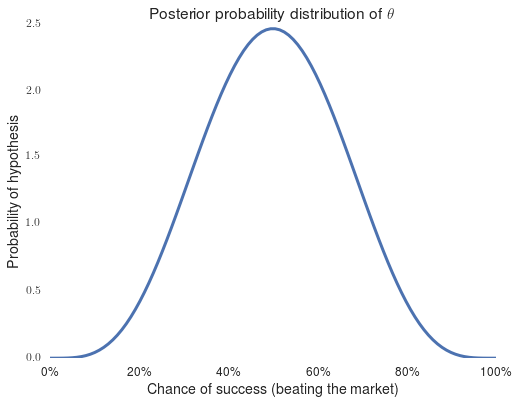

In [6]:
gen_plot(0, 0)

In [7]:
def plot_approx():
    from scipy import stats
    fig = ppl.plt.figure(figsize=(14, 6))
    x_plot = np.linspace(0, 1, 200)
    ax1 = fig.add_subplot(121, title='What we want', ylim=(0, 2.5))# , xlabel=r'$\theta$', ylabel=r'$P(\theta)$')
    ppl.plot(ax1, x_plot, stats.beta(4, 4).pdf(x_plot), linewidth=4.)
    ax2 = fig.add_subplot(122, title='What we get', xlim=(0, 1), ylim=(0, 2300))#, xlabel=r'\theta', ylabel='\# of samples')
    ax2.hist(stats.beta(4, 4).rvs(20000), bins=20);

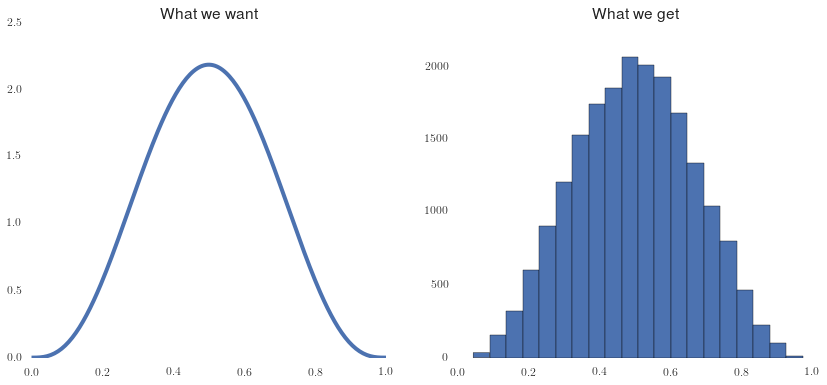

In [8]:
plot_approx()

In [15]:
def gen_plot(successes=(0, 100, 1), failures=(0, 100, 1)):
    alpha_prior=5
    beta_prior=5
    if successes == 0 and failures == 0:
        title = r'Prior probability distribution on $\theta$'
    else:
        title = r'Posterior probability distribution of $\theta$ after having seen data'
        
    alpha = alpha_prior + successes
    beta = beta_prior + failures
    x = np.linspace(0, 1, 201)
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, xlabel=r'Chance of success (profit or conversion)', 
                         ylabel=r'Probability',
                         title=title)
    ax.plot(x, sp.stats.beta(alpha, beta).pdf(x), linewidth=3.)
    ax.set_xticklabels([r'0\%', r'20\%', r'40\%', r'60\%', r'80\%', r'100\%']);
    
    return


In [10]:
def gen_plot(success=(0, 100), failure=(0, 100)):
    alpha = 5 + success
    beta = 5 + success
    fig = plt.figure(figsize=(8, 6))
    x = np.linspace(0, 1, 100)
    ax = fig.add_subplot(111, xlabel='Chance of success (beating the market)', 
                         ylabel='Probability of hypothesis', 
                         title=r'Posterior probability distribution of $\theta$')
    ax.plot(x, sp.stats.beta(alpha, beta).pdf(x), linewidth=3.)
    ax.set_xticklabels(['0\%', '20\%', '40\%', '60\%', '80\%', '100\%']);

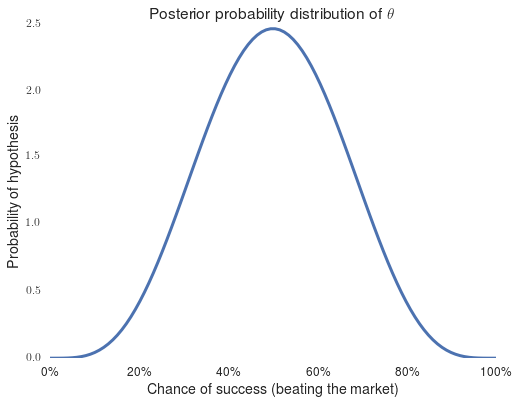

In [11]:
gen_plot(0, 0)

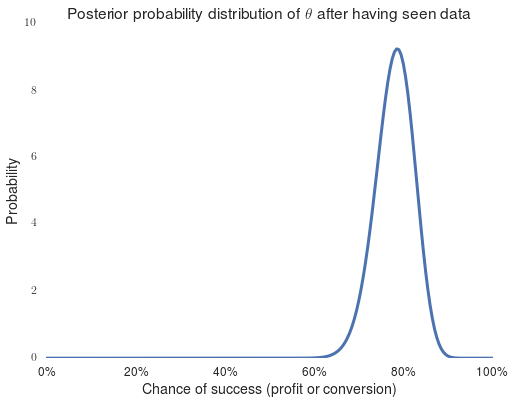

In [16]:
interactive(gen_plot)

In [17]:
def plot_approx():
    from scipy import stats
    fig = ppl.plt.figure(figsize=(14, 6))
    x_plot = np.linspace(0, 1, 200)
    ax1 = fig.add_subplot(121, title='What we want', ylim=(0, 2.5))# , xlabel=r'$\theta$', ylabel=r'$P(\theta)$')
    ppl.plot(ax1, x_plot, stats.beta(4, 4).pdf(x_plot), linewidth=4.)
    ax2 = fig.add_subplot(122, title='What we get', xlim=(0, 1), ylim=(0, 2300))#, xlabel=r'\theta', ylabel='\# of samples')
    ax2.hist(stats.beta(4, 4).rvs(20000), bins=20);

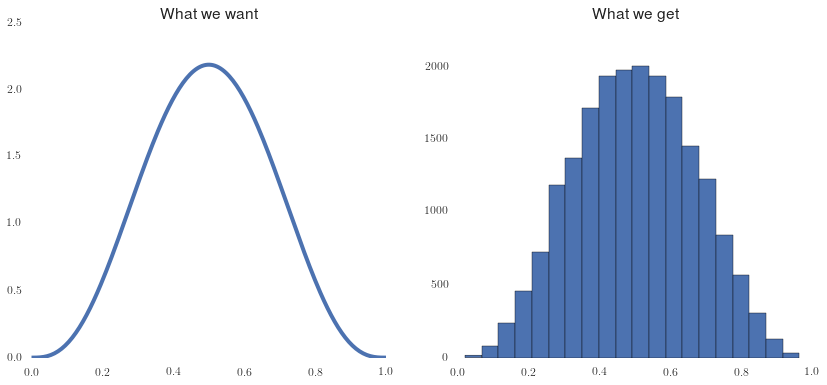

In [18]:
plot_approx()

In [19]:
np.random.seed(9)
algo_a = sp.stats.bernoulli(.5).rvs(300) # 50% profitable days
algo_b = sp.stats.bernoulli(.6).rvs(300) # 60% profitable days

In [20]:
import pymc3 as pm
model = pm.Model()
with model: # model specifications in PyMC3 are wrapped in a with-statement
    # Define random variables
    theta_a = pm.Beta('theta_a', alpha=5, beta=5) # prior
    theta_b = pm.Beta('theta_b', alpha=5, beta=5) # prior
    
    # Define how data relates to unknown causes
    data_a = pm.Bernoulli('observed A',
                          p=theta_a, 
                          observed=algo_a)
    
    data_b = pm.Bernoulli('observed B', 
                          p=theta_b, 
                          observed=algo_b)
    
    # Inference!
    start = pm.find_MAP() # Find good starting point
    step = pm.Slice() # Instantiate MCMC sampling algorithm
    trace = pm.sample(10000, step, start=start, progressbar=False) # draw posterior samples using slice sampling 

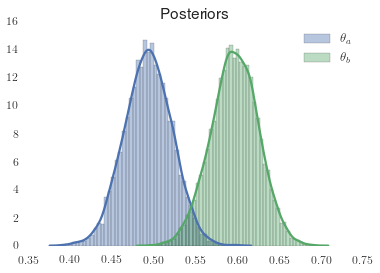

In [22]:
sns.distplot(trace['theta_a'], label=r'$\theta_a$')
sns.distplot(trace['theta_b'], label=r'$\theta_b$')
plt.title('Posteriors')
plt.legend()
plt.show()

In [23]:
p_b_better_than_a = np.mean(trace['theta_a'] < trace['theta_b'])
print 'Probability that algo B is better than A = %.2f%%' % (p_b_better_than_a * 100)

Probability that algo B is better than A = 99.46%


In [24]:
np.random.seed(9)
algos = []
algos_idx = []
samples = 300
for i, p_algo in enumerate(sp.stats.beta(10, 10).rvs(20)):
    algos.append(sp.stats.bernoulli(p_algo).rvs(samples))
    algos_idx.append(np.ones(samples) * i)
    
algos = np.asarray(algos)
algos_idx = np.asarray(algos_idx, dtype=np.int)
print algos.shape
print algos
print algos_idx

(20, 300)
[[0 1 1 ..., 1 0 0]
 [0 1 1 ..., 0 1 0]
 [1 1 1 ..., 1 1 1]
 ..., 
 [1 0 0 ..., 1 0 1]
 [0 1 1 ..., 0 0 0]
 [1 1 0 ..., 0 1 0]]
[[ 0  0  0 ...,  0  0  0]
 [ 1  1  1 ...,  1  1  1]
 [ 2  2  2 ...,  2  2  2]
 ..., 
 [17 17 17 ..., 17 17 17]
 [18 18 18 ..., 18 18 18]
 [19 19 19 ..., 19 19 19]]


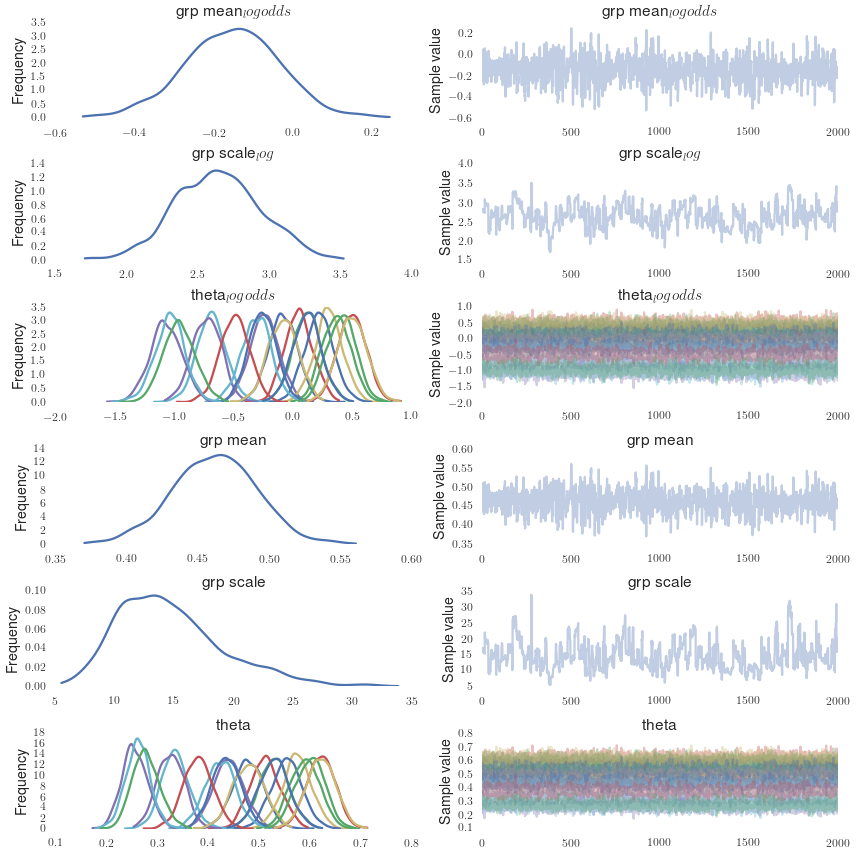

In [29]:
with pm.Model() as model: # model specifications in PyMC3 are wrapped in a with-statement
    # Define random variables
    grp_mean = pm.Beta('grp mean', alpha=2, beta=2) # prior
    grp_scale = pm.Gamma('grp scale', alpha=1, beta=10./10**2) # prior
    
    # Transform
    alpha = grp_mean * grp_scale
    beta = (1 - grp_mean) * grp_scale
    
    # Individual random variables, vector of lenght 20
    theta = pm.Beta('theta', alpha=alpha, beta=beta, shape=20)
    
    # Define how data relates to unknown causes
    data = pm.Bernoulli('observed',
                        p=theta[algos_idx],
                        observed=algos)
    
    # Inference!
    start = pm.find_MAP() # Find good starting point
    step = pm.NUTS (scaling=start) # Instantiate MCMC sampling algorithm
    trace = pm.sample(3000, step, start=start, progressbar=False)[:2000] # draw posterior samples using slice sampling
    
    pm.traceplot(trace);